In [15]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
from scipy.stats import boxcox

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
air = pd.read_csv("AirPassengers.csv", index_col=0, header=0)
air.info()
air.index = pd.to_datetime(air.index, format='%Y-%m')
air.index.freq = 'MS'

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2+ KB


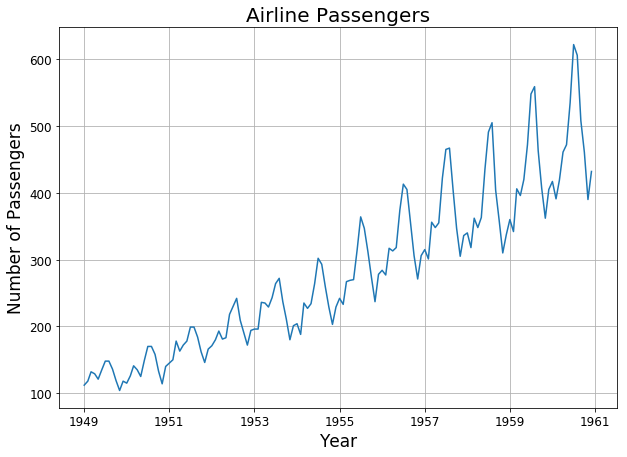

In [8]:
plt.plot(air)
plt.title('Airline Passengers', fontsize = '20')
plt.ylabel('Number of Passengers', fontsize = '17')
plt.xlabel('Year', fontsize='17', horizontalalignment='center')
plt.grid()
plt.show()

There are several things to note about this series:
1. It is not stationary; the series exhibits trend
2. There is seasonality
3. Non-constant variance

We will apply the Box-Cox power transformation,

0.9745768264042034


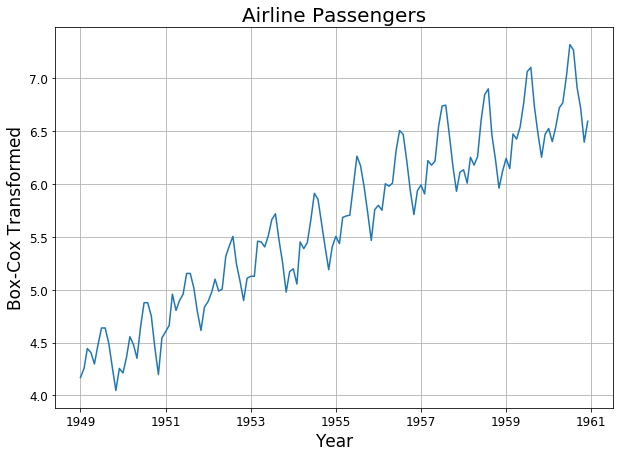

In [30]:
air_bc = boxcox(air['#Passengers'])
lmbda = air_bc[1]
print(lmbda)

air['#Passengers'] = air_bc[0]
plt.plot(air)
plt.title('Airline Passengers', fontsize = '20')
plt.ylabel('Box-Cox Transformed', fontsize = '17')
plt.xlabel('Year', fontsize='17', horizontalalignment='center')
plt.grid()
plt.show()

<Figure size 720x504 with 0 Axes>

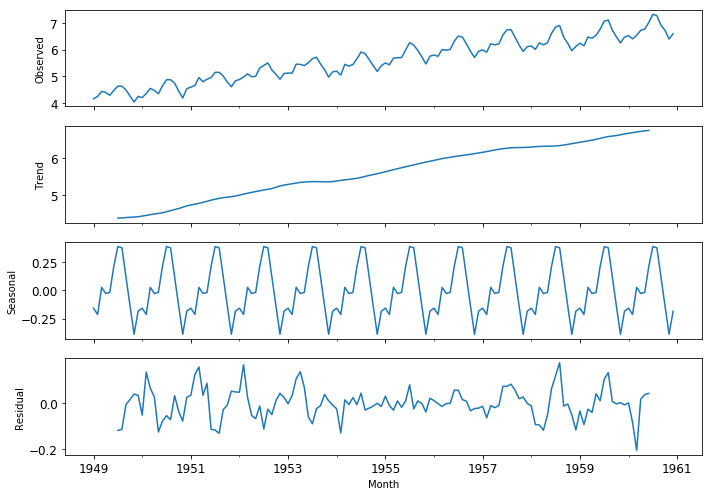

In [31]:
decomposition = seasonal_decompose(air['#Passengers'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()